In [49]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery
from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


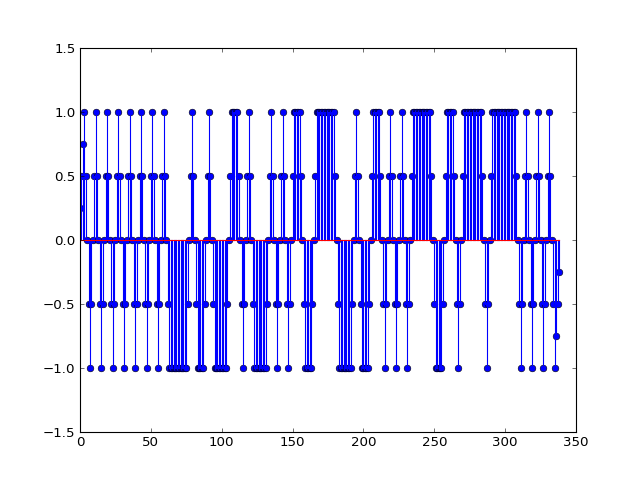

In [50]:
from pyhacores.under_construction.clock_recovery.test_ import data_gen

insig = data_gen('aaaa123456789abcdefaa', sps=4)

plt.stem(insig)
plt.show()

<IPython.core.display.Javascript object>


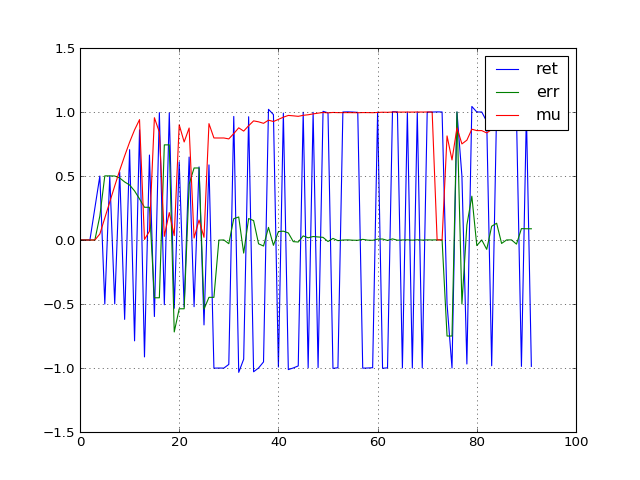

[0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
0x1aaaaaa123456789abcdefa


In [51]:
sps = 4
insig = data_gen('aaaaaa123456789abcdefaa', sps, int_delay=0, fract_delay=0.0)
recover = GardnerTimingRecovery(sps)

ret, err, mu = recover.model_main(insig)
plt.plot(ret, label='ret')
plt.plot(err, label='err')
plt.plot(mu, label='mu')
#     plt.plot(sig_f[::sps], label='decimated input')
plt.grid()
plt.legend()
plt.show()

bits = [1 if x >0 else 0 for x in ret]
print(bits)
from pyha.common.util import bools_to_hex
print(bools_to_hex(bits[0:]))

<IPython.core.display.Javascript object>


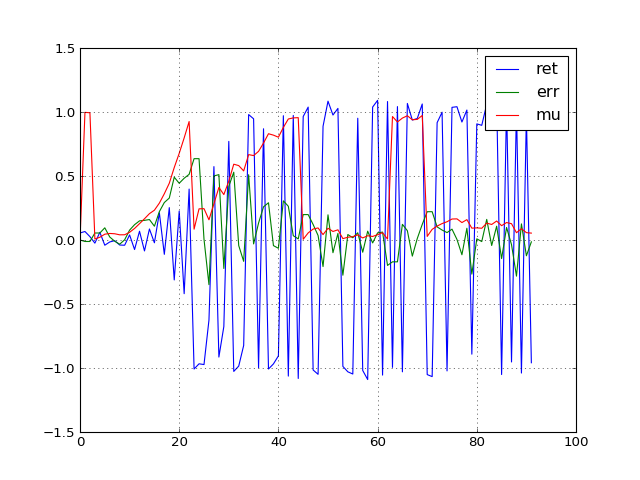

[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
0xe82aaa123456789abcdefaa


In [48]:
sps = 4
insig = data_gen('aaaaaa123456789abcdefaa', sps, int_delay=4, fract_delay=0.292, noise_amp=0.1)
recover = GardnerTimingRecovery(sps)

ret, err, mu = recover.model_main(insig)
plt.plot(ret, label='ret')
plt.plot(err, label='err')
plt.plot(mu, label='mu')
#     plt.plot(sig_f[::sps], label='decimated input')
plt.grid()
plt.legend()
plt.show()

bits = [1 if x >0 else 0 for x in ret]
print(bits)
from pyha.common.util import bools_to_hex
print(bools_to_hex(bits[0:]))